In [4]:

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

In [5]:
# Set image dimensions
img_rows, img_cols = 102, 136
data_path = 'C:/Users/Sai/Downloads/Face_Mask_Detection22/dataset'

# Initialize lists for images (x) and labels (y)
x, y = [], []
counter = 0

# Get the class labels
classes = os.listdir(data_path)
print(classes)

['without_mask', 'with_mask']


In [6]:
# Iterate through 'with_mask' and 'without_mask' directories
for class_path in os.listdir(data_path):
    class_folder_path = os.path.join(data_path, class_path)

    # Ensure it's a directory
    if os.path.isdir(class_folder_path):
        for img_path in os.listdir(class_folder_path):
            img_full_path = os.path.join(class_folder_path, img_path)

            # Load image and resize
            image = load_img(img_full_path, target_size=(img_rows, img_cols))

            # Convert image to array
            image = img_to_array(image)

            # Append image to 'x' and label (counter) to 'y'
            x.append(image)
            y.append(counter)

    # Increment label counter for the next class
    counter += 1

# Convert lists to numpy arrays for model processing
x = np.array(x)
y = np.array(y)

C:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_val = keras.utils.to_categorical(y_val, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

X_train.shape

(6042, 102, 136, 3)

In [8]:
model = Sequential()
model.add(Conv2D(12, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 132, 12)       912       
                                                                 
 average_pooling2d (Average  (None, 49, 66, 12)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 62, 32)        9632      
                                                                 
 average_pooling2d_1 (Avera  (None, 22, 31, 32)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 21824)             0         
                                                                 
 dense (Dense)               (None, 120)               

In [9]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['Accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data = (X_val, y_val), epochs=10)


Epoch 1/10


51/51 [==============================] - 35s 489ms/step - loss: 12.0005 - Accuracy: 0.6541 - val_loss: 0.5856 - val_Accuracy: 0.8212
Epoch 2/10
51/51 [==============================] - 23s 463ms/step - loss: 0.5903 - Accuracy: 0.7203 - val_loss: 0.6733 - val_Accuracy: 0.7894
Epoch 3/10
51/51 [==============================] - 20s 389ms/step - loss: 0.5042 - Accuracy: 0.7572 - val_loss: 0.5869 - val_Accuracy: 0.6980
Epoch 4/10
51/51 [==============================] - 20s 391ms/step - loss: 0.3749 - Accuracy: 0.8383 - val_loss: 0.5428 - val_Accuracy: 0.7430
Epoch 5/10
51/51 [==============================] - 19s 371ms/step - loss: 0.3169 - Accuracy: 0.8638 - val_loss: 0.5304 - val_Accuracy: 0.7563
Epoch 6/10
51/51 [==============================] - 23s 454ms/step - loss: 0.2579 - Accuracy: 0.8999 - val_loss: 0.5466 - val_Accuracy: 0.7735
Epoch 7/10
51/51 [==============================] - 23s 447ms/step - loss: 0.1792 - Accuracy: 0.9378 - val_loss: 0.6220 - val_Accuracy: 0.

In [10]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

24/24 [==============================] - 1s 31ms/step - loss: 0.8576 - Accuracy: 0.8056
Test loss: 0.857624351978302
Test accuracy: 0.8055555820465088


24/24 [==============================] - 1s 30ms/step


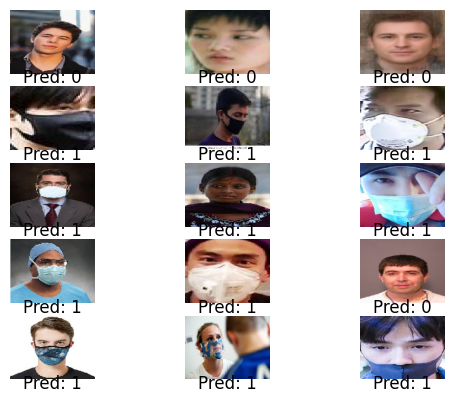

In [11]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"), cmap='gray')  # Display the test image
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {predicted_labels[i]}", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.show()

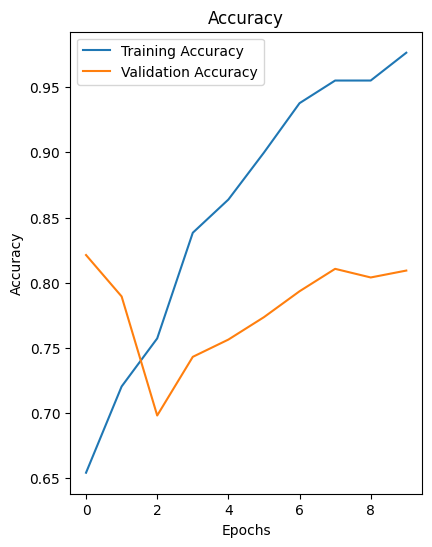

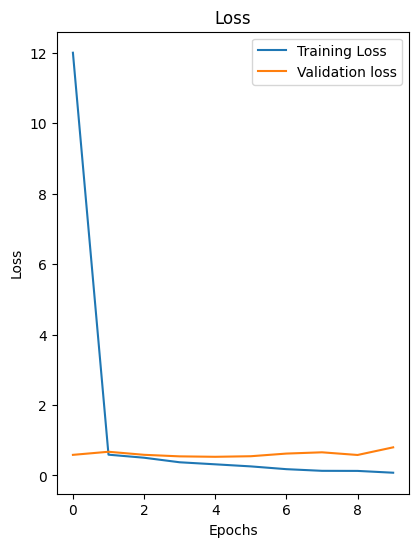

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_Accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [13]:
model.save('face_mask_detection_model3.h5')

C:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Check available keys
print(history.history.keys())

# Access metrics based on available keys
train_accuracy = history.history.get('accuracy', history.history.get('acc', []))
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc', []))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print out the metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])
Training Accuracy: []
Validation Accuracy: []
Training Loss: [12.000472068786621, 0.590307354927063, 0.5041983723640442, 0.3748582601547241, 0.3168700933456421, 0.25794315338134766, 0.1791837215423584, 0.1322181671857834, 0.12986750900745392, 0.07838022708892822]
Validation Loss: [0.5855855345726013, 0.6732631325721741, 0.586892306804657, 0.5427643656730652, 0.5303806662559509, 0.546554684638977, 0.6219559907913208, 0.6577495336532593, 0.5820754170417786, 0.7988909482955933]
